<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/machinelearning/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter3: Regression, Overfitting and Underfitting

Supervised learning is divided into two main types: (1) Classification and (2) Regression.

In classification, the goal is to predict the categorical class labels of new instances based on past observations. The output variable is a category, such as "spam" or "not spam," "fraudulent" or "not fraudulent," or "cat," "dog," or "bird." Classification algorithms learn from labeled training data and make predictions on unseen data.

In regression, the goal is to predict a continuous quantity or numeric value. The output variable is a real value, such as predicting the price of a house, the temperature, or a person's age. Regression algorithms learn from labeled training data with continuous outcomes and make predictions on new data. It is to analyze the relationship between two variables, typically denoted as **X** and **Y**. In this chapter, we will talk about regression.

K-Nearest Neighbors (k-NN) is versatile, serving both classification and regression tasks. In classification, with k = 3 (# of neighbors), where k1 represents Square, k2 represents Square, and k3 represents Triangle, the sample **X** is classified as 'Square' since 'Square' is the dominant class. In regression, also with k = 3, where k1 = 100, k2 = 80, and k3 = 60, the sample **X** is assigned the value 80 as the mean of the three values.

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

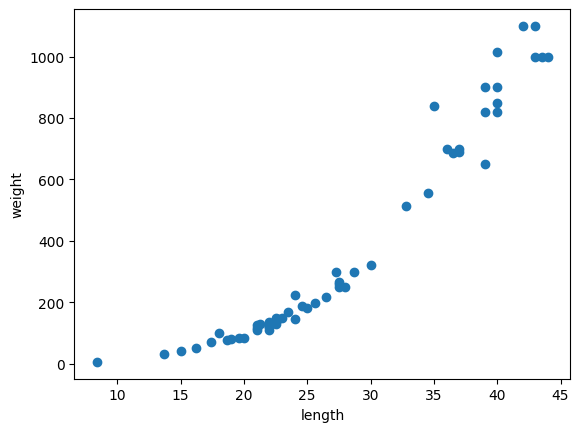

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
print(train_input.shape)

(42,)


Scikit-learn's the training set (input data) is typically expected to be a 2D array or matrix. This is because scikit-learn models, including those for supervised learning like classifiers and regressors, expect the input data to be organized in a 2D array or matrix where **each row corresponds to a sample (data point) and each column corresponds to a feature**. *perch_length* is a 1D array, and train_input and test_input are also 1D array.

In scikit-learn, the **reshape()** method can be used to transform a 1D array into a 2D array or matrix.

In [5]:
test_array = np.array([1,2,3,4])
print(test_array)

[1 2 3 4]


In [6]:
new_test_array = test_array.reshape(2,2)
print(new_test_array)
print(new_test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


**reshape(-1, 1)** syntax: when you use -1 in one of the dimensions, NumPy automatically calculates the size of that dimension based on the length of the array and the other specified dimension.

In [7]:
print("The current train_input shape is", train_input.shape)

The current train_input shape is (42,)


In [8]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In classification tasks, accuracy is calculated as the ratio of correctly classified samples to the total number of samples.

\begin{align*}
\text{Accuracy} = \frac{\text{Number of Correctly Classified Samples}}{\text{Total Number of Samples}}
\end{align*}

In regression, $R^2$ represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).

$R^2$ (Coefficient of Determination) Formula:

\begin{align*}
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
\end{align*}

If the model predicts at the level of the target's mean (where the numerator and denominator become similar), $R^2$ approaches zero. As predictions get closer to the target, the numerator approaches zero, resulting in the
$R^2$ value approaching one. **If the model is not doing better than predicting the average of the target values, $R^2$ will be close to 0**.

> $R$ and $R^2$

$R$ measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where:
* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship,
* 0 indicates no linear relationship.

It is a measure of how well the points in a scatter plot fit a straight line.

$R^2$ is a measure of how well the independent variable(s) explain the variability of the dependent variable in a regression model. It ranges from 0 to 1, where:
* 0 indicates that the model does not explain any of the variability,
* 1 indicates that the model explains all the variability.

It is calculated as the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [10]:
print(knr.score(test_input,test_target))

0.992809406101064


The result of score is 0.99, which is pretty good. However, understanding how good it is intuitively, like accuracy, can be difficult by using $R^2$. Alternatively, you can calculate other values. *mean_absolute_error()* returns the average absolute error between the target and the prediction.

In [11]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


From the result, the prediction on average is different around 19g. This is a absolute error, so the + or -19g differ from the mean.

In [12]:
print(knr.score(train_input, train_target))

0.9698823289099254


### Overfitting and Underfitting

* Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations. It performs well on the training data but poorly on new, unseen data because it has essentially memorized the training set instead of learning the underlying patterns.
* Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training data and new, unseen data because it fails to grasp the complexity of the relationships within the dataset.

Our model's result shows the underfitting issue. It means that it is too simple to capture the underlying patterns in the data.

Saving under_overfitting.png to under_overfitting (7).png


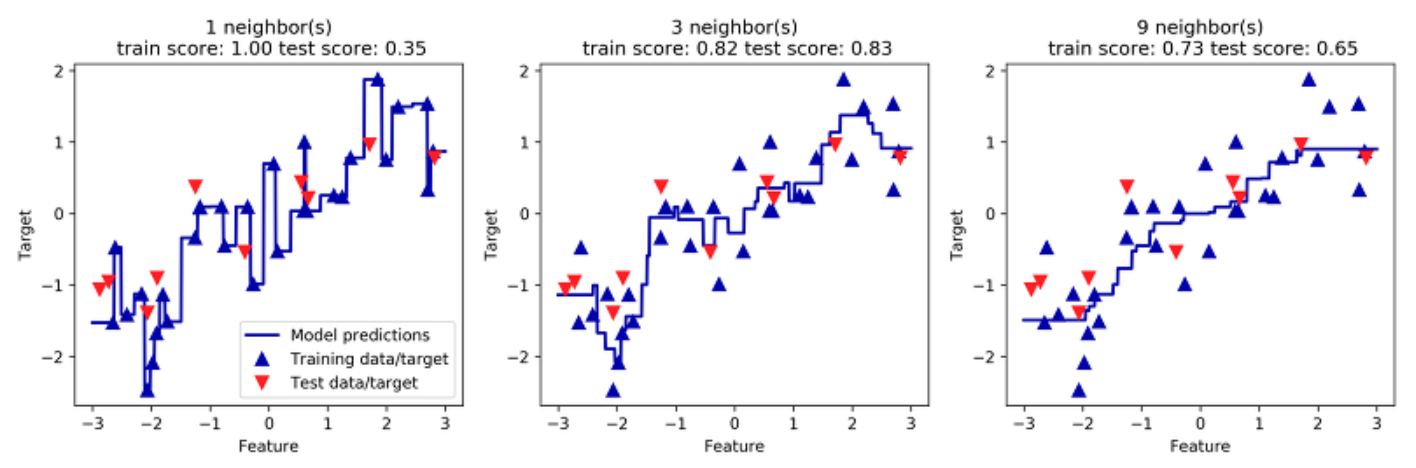

In [13]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('under_overfitting.png')

Underfitting can occur if the value of k (the number of neighbors considered) is too large. This is because a larger k leads to a simpler model that may fail to capture the underlying patterns in the data. We can decrease the default number $k$ 5 to 3.

In [14]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


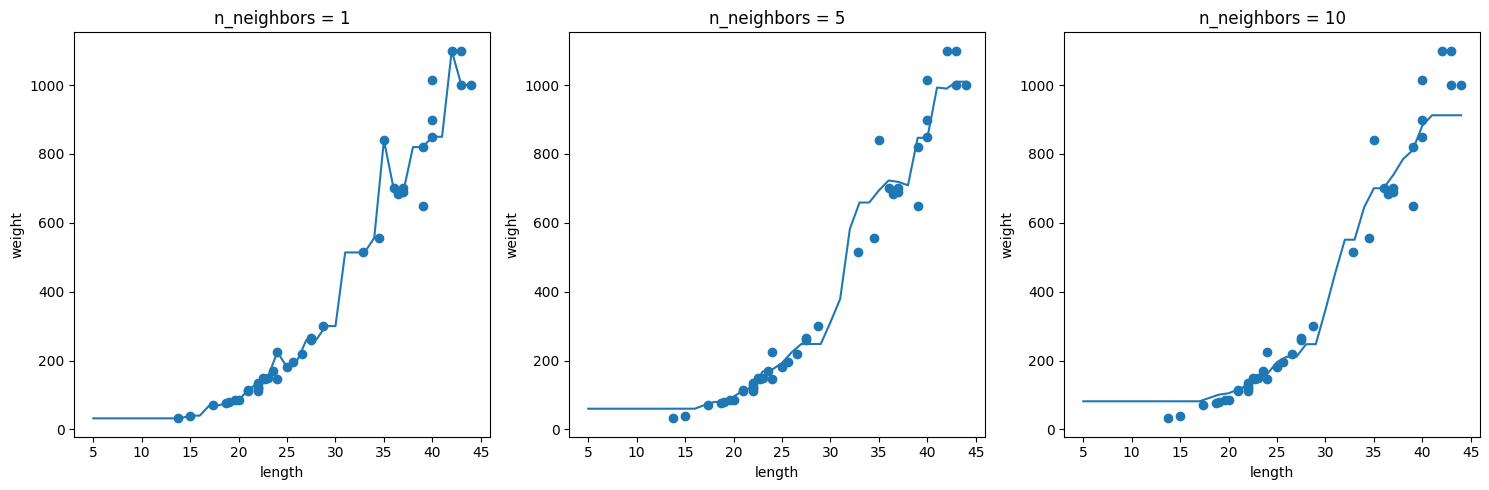

In [15]:
knr = KNeighborsRegressor()

# create the coordinate range from 5 to 45 ... (40, 1)
x = np.arange(5, 45).reshape(-1, 1)

# when n =1, 5, 10, the prediction shows:
n_values = [1, 5, 10]

# create subplots
fig, axes = plt.subplots(1, len(n_values), figsize=(15, 5))

# iterate over different values of n_neighbors
for n, ax in zip(n_values, axes):
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    # plot on the corresponding subplot
    ax.scatter(train_input, train_target)
    ax.plot(x, prediction)
    ax.set_title('n_neighbors = {}'.format(n))
    ax.set_xlabel('length')
    ax.set_ylabel('weight')

# adjust layout for better spacing
plt.tight_layout()
plt.show()